In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Styling
plt.style.use('tdrstyle.mplstyle')

In [9]:
old_file = '../test7/histos_tba.16.npz'
with np.load(old_file) as loaded:
  old_variables = loaded['variables']
  old_parameters = loaded['parameters']

In [10]:
new_file = '../test7/histos_tba.17.npz'
with np.load(new_file) as loaded:
  new_variables = loaded['variables']
  new_parameters = loaded['parameters']

In [11]:
nlayers = 12

In [13]:
old_x_bend = old_variables[:, nlayers*2:nlayers*3]
old_x_mask = old_variables[:, nlayers*6:nlayers*7].astype(np.bool)
old_y_pt   = old_parameters[:, 0]
new_x_bend = new_variables[:, nlayers*2:nlayers*3] * -1
new_x_mask = new_variables[:, nlayers*6:nlayers*7].astype(np.bool)
new_y_pt   = new_parameters[:, 0]

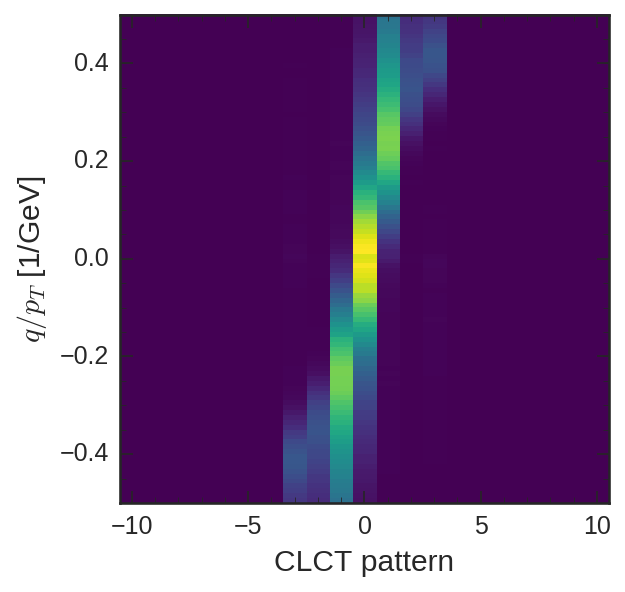

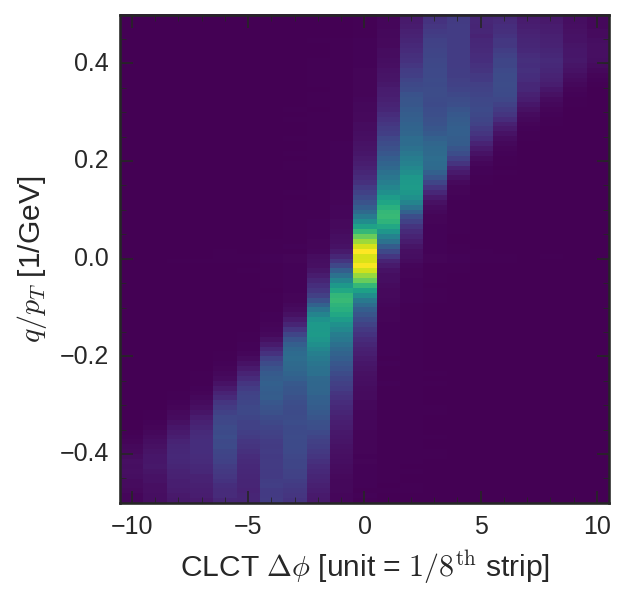

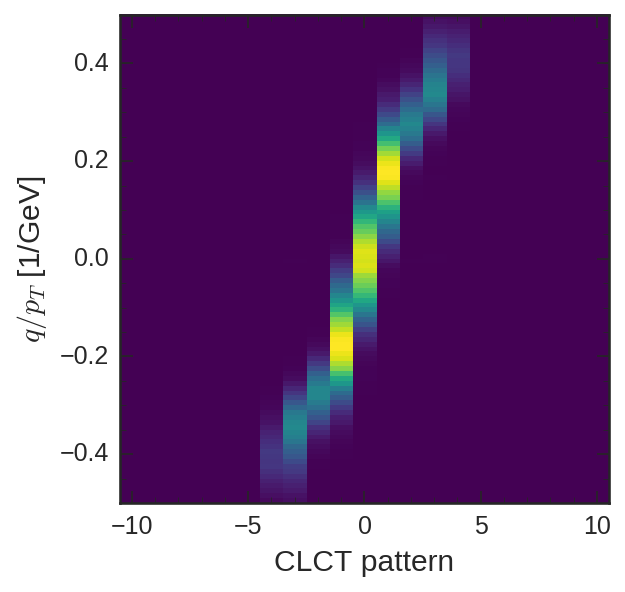

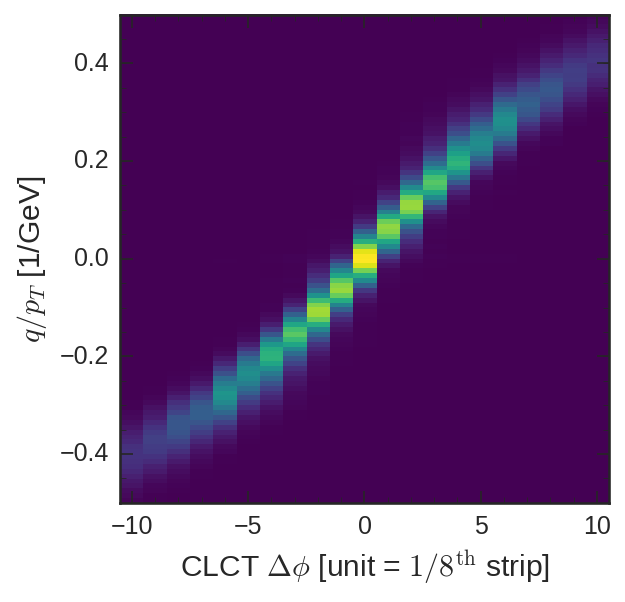

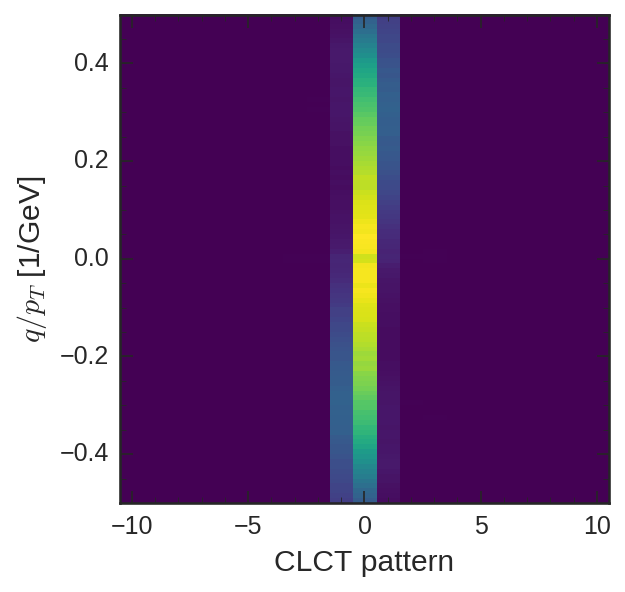

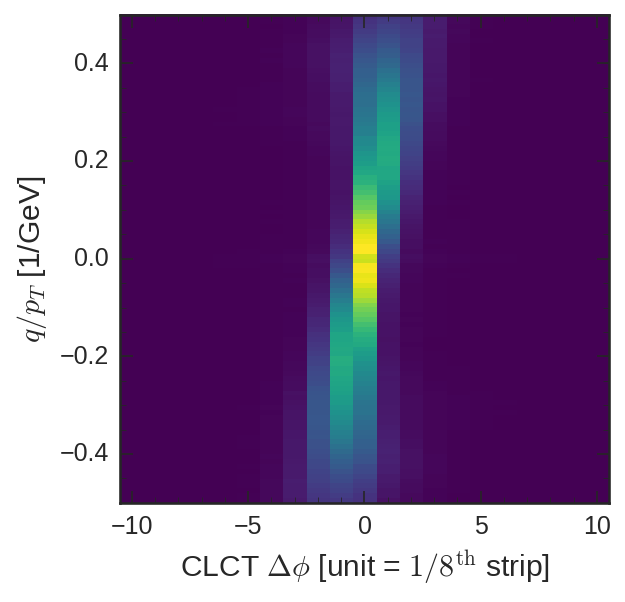

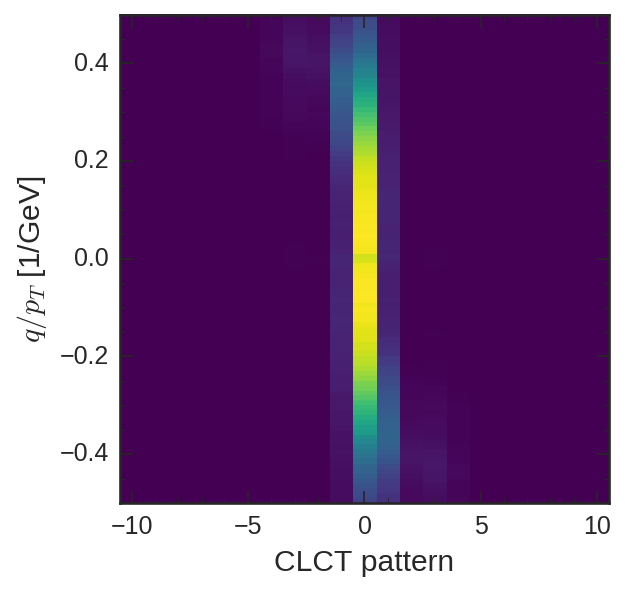

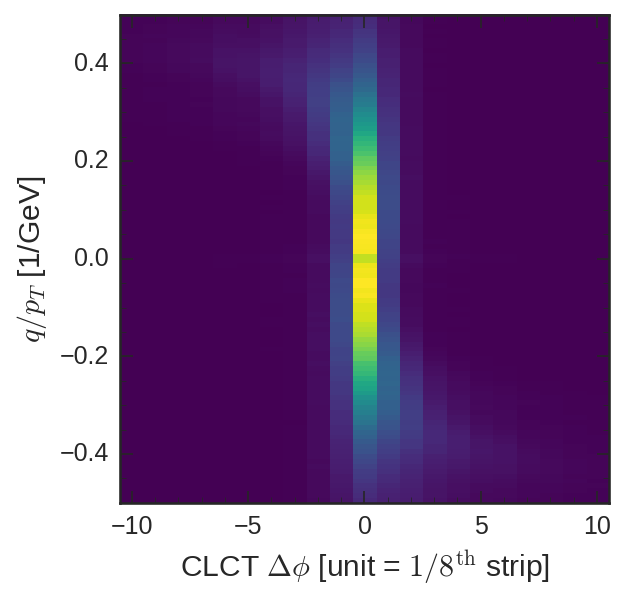

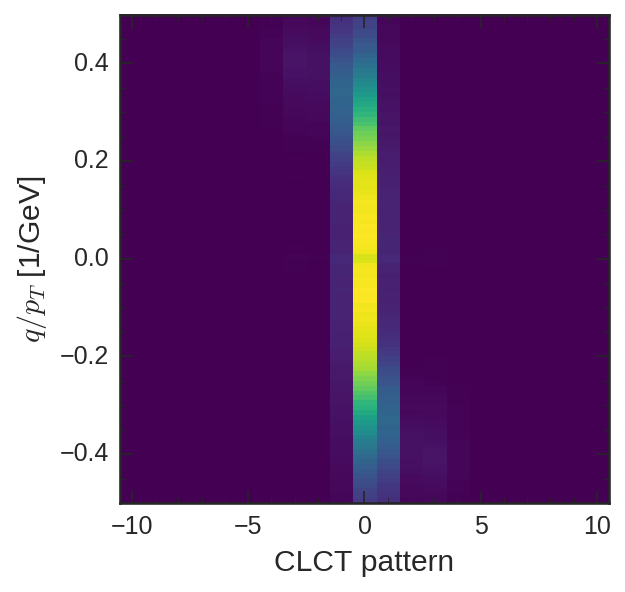

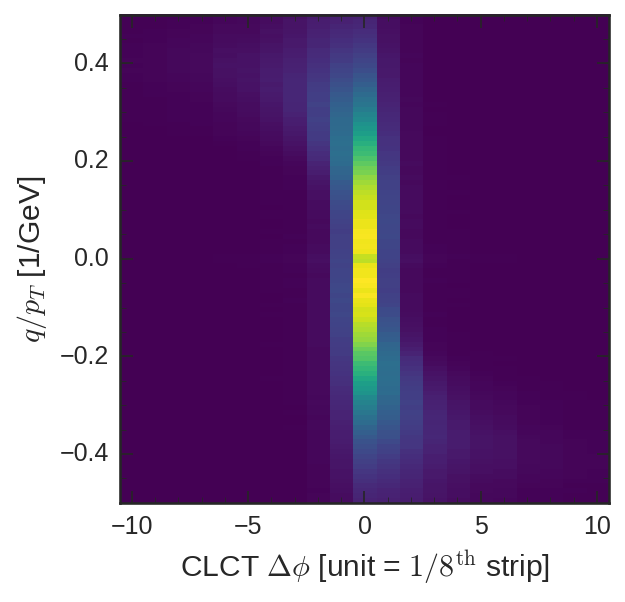

In [20]:
for lay in [0,1,2,3,4]:
  for is_new, x_bend, x_mask, y_pt in zip(['old', 'new'], [old_x_bend, new_x_bend], [old_x_mask, new_x_mask], [old_y_pt, new_y_pt]):
    plt.figure()

    xmin, xmax = -10.5, 10.5
    ymin, ymax = -0.5, 0.5
    _range = [[xmin, xmax], [ymin, ymax]]
    #_range = None
    _bins = (21, 100)
    #_bins = 40

    mask = x_mask[...,lay]
    valid = ~mask
    x_i = x_bend[valid,lay]
    y_i = y_pt[valid]

    plt.hist2d(x_i, y_i, bins=_bins, range=_range, cmap=plt.cm.viridis)
    if is_new == 'old':
      plt.xlabel(r'CLCT pattern')
    else:
      plt.xlabel(r'CLCT $\Delta\phi$ [unit = $1/8^\mathrm{th}$ strip]')
    plt.ylabel(r'$q/p_{T}$ [1/GeV]')
    plt.show()